# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Goals

In this analysisI will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy as sp

In [46]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/FY_2021_Hospital_Readmissions_Reduction_Program_Hospital.csv')

****
## Preliminary Analysis

In [47]:
# these are excluded from the analysis
hospital_read_df[hospital_read_df.loc[:, 'Number of Discharges'].isna()].shape

(7981, 12)

In [48]:
# deal with missing and inconvenient portions of data
clean_hospital_read_df = hospital_read_df[~hospital_read_df.loc[:, 'Number of Discharges'].isna()]
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df = clean_hospital_read_df[~clean_hospital_read_df['Excess Readmission Ratio'].isna()]
# coerce to integer type
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [50]:
clean_hospital_read_df.shape

(11103, 12)

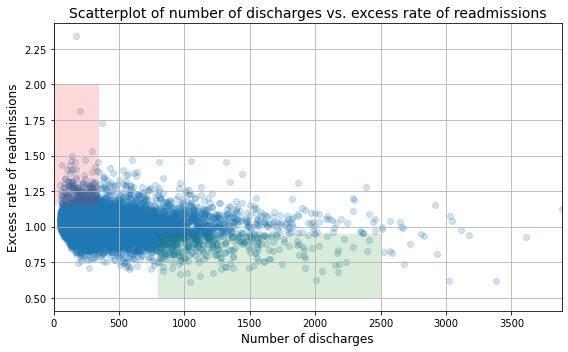

In [51]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report


**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 68% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 45% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

In [52]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

df = pd.concat([x,y], axis=1)
df.columns = ['discharges', 'excess_readmissions']
df.tail()

,discharges,excess_readmissions
11014,3113,0.9736
11015,3179,0.9405
11016,3384,0.6193
11017,3613,0.9272
11018,3883,1.1233


### Overall, rate of readmissions is trending down with increasing number of discharges

We can find this to be true because of the small p-value attached to the negative trendline. (99% confidence)

/Users/sarahluw/.pyenv/versions/3.6.2/envs/my-virtual-env-3.6.2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


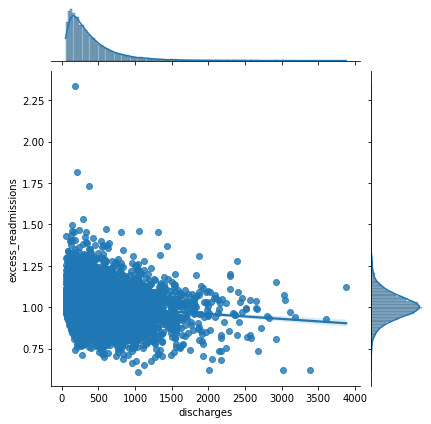

In [53]:
sns.jointplot('discharges', 'excess_readmissions', data=df, kind='reg')

### With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

The p-value is a bit larger than 0.05; which is needed for 95% confidence. However, 0.09 is good enough for 90% confidence.

/Users/sarahluw/.pyenv/versions/3.6.2/envs/my-virtual-env-3.6.2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


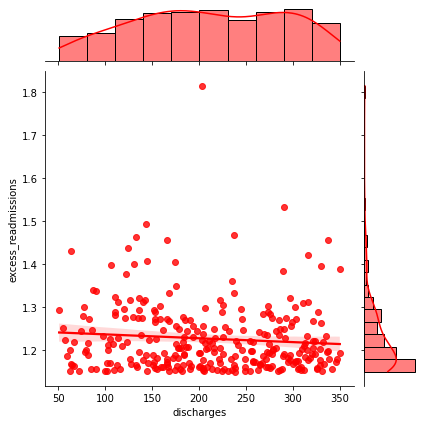

In [54]:
red = df[df.discharges <= 350]
red = red[red['excess_readmissions'] >= 1.15]
red = red[red['excess_readmissions'] <= 2.00]
sns.jointplot('discharges', 'excess_readmissions', data=red, kind='reg', color="r")

### With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

We can find this to be true because of the small p-value attached to the negative trendline. (99% confidence)

/Users/sarahluw/.pyenv/versions/3.6.2/envs/my-virtual-env-3.6.2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


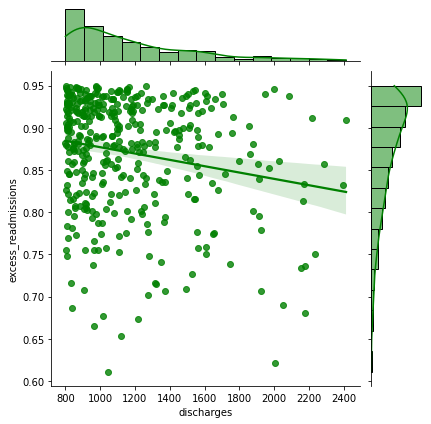

In [55]:
green = df[df.discharges >= 800]
green = green[green.discharges <= 2500]
green = green[green['excess_readmissions'] >= 0.50]
green = green[green['excess_readmissions'] <= 0.95]
sns.jointplot('discharges', 'excess_readmissions', data=green, kind='reg', color="g")

### In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 69% have excess readmission rate greater than 1

In [56]:
lo_df = df[df.discharges < 100]
lo_discharges, lo_excess_readmissions = lo_df.mean()
lo_greater_than_one = len(lo_df[lo_df.excess_readmissions > 1]) / len(lo_df)

print('Excess readmission rate :', '%.3f' % lo_excess_readmissions)
print('%.2f' % lo_greater_than_one, 'have excess readmission rate greater than 1.')

Excess readmission rate : 1.028
0.69 have excess readmission rate greater than 1.


/Users/sarahluw/.pyenv/versions/3.6.2/envs/my-virtual-env-3.6.2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


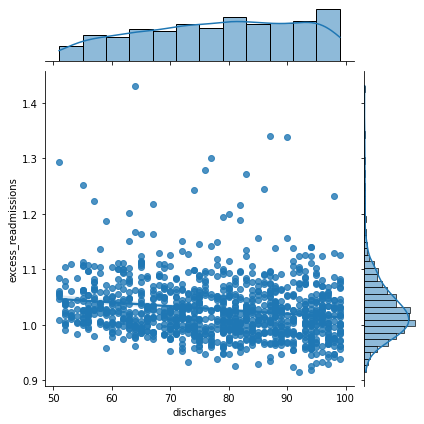

In [57]:
sns.jointplot('discharges', 'excess_readmissions', data=lo_df, kind='reg')

### In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 45% have excess readmission rate greater than 1

##### NOTE: Although this is true, there is no trend that says excess readmission rates decrease . See joint plot for more info. (p=0.65) Thus, this statistic could be misleading.

In [58]:
hi_df = df[df.discharges > 1000]
hi_discharges, hi_excess_readmissions = hi_df.mean()
hi_greater_than_one = len(hi_df[hi_df.excess_readmissions > 1]) / len(hi_df)

print('Excess readmission rate :', '%.3f' % hi_excess_readmissions)
print('%.2f' % hi_greater_than_one, 'have excess readmission rate greater than 1.')

Excess readmission rate : 0.980
0.45 have excess readmission rate greater than 1.


/Users/sarahluw/.pyenv/versions/3.6.2/envs/my-virtual-env-3.6.2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


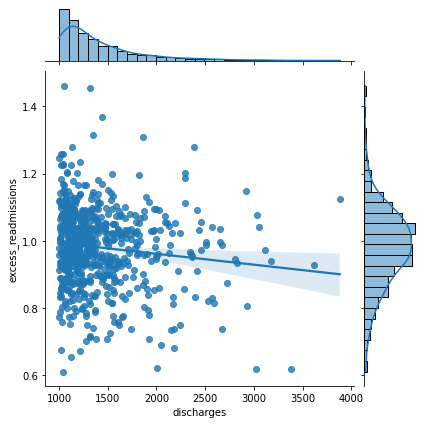

In [59]:
sns.jointplot('discharges', 'excess_readmissions', data=hi_df, kind='reg')

### There is a significant correlation between hospital capacity (number of discharges) and readmission rates. (99% confidence)

This conclusion follows our first observation.

/Users/sarahluw/.pyenv/versions/3.6.2/envs/my-virtual-env-3.6.2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


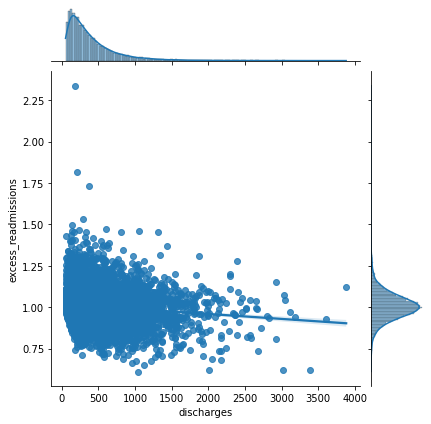

In [60]:
sns.jointplot('discharges', 'excess_readmissions', data=df, kind='reg')

### Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

According to the data, this a reasonable. However, there may be other factors such as insurance and doctor ratings not available in the data.

### Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

This is a bold recommendation. We need to see the pros and cons of introducing upgraded resource allocation.

Pros
+ Save patient time
+ Increase space for new patients
+ Secure government funding

Cons
+ Less readmissions could result in less income
+ Low income could lead to shut down of smaller hospitals

If trying to meet regulatory policies, then smaller hospitals should be required to demonstrate upgraded resource allocation. However, at a business perspective, they should be reccomended to do so only if it is beneficial for the hospital itself.

In [61]:
lo_df = df[df.discharges < 300]
lo_discharges, lo_excess_readmissions = lo_df.mean()
lo_greater_than_one = len(lo_df[lo_df.excess_readmissions > 1]) / len(lo_df)

print('Excess readmission rate :', '%.3f' % lo_excess_readmissions)
print('%.2f' % lo_greater_than_one, 'have excess readmission rate greater than 1.')

Excess readmission rate : 1.014
0.55 have excess readmission rate greater than 1.


/Users/sarahluw/.pyenv/versions/3.6.2/envs/my-virtual-env-3.6.2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


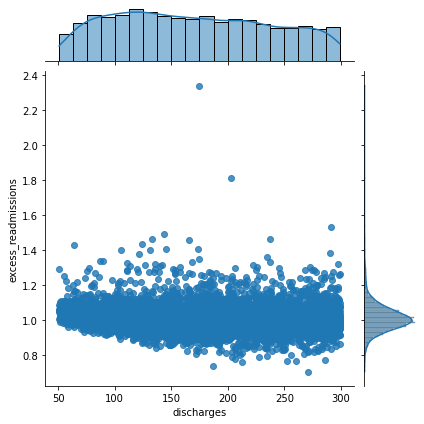

In [62]:
sns.jointplot('discharges', 'excess_readmissions', data=lo_df, kind='reg')

### Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

Following the previous logic, this could benefit patient or the hospital. The directives and incentives should vary due to different circumstances. For example, larger hospitals with more flexible budgets could focus on less excess readmission. Smaller hospitals could be encouraged to consolidate if it could benefit them over simply reallocating resources.

# New Hypothesis Testing

Our new hypothesis is going to be: There is a significant difference between excess readmission rates for different states.

In [63]:
# Making a new dataframe with state variables 

x = list(clean_hospital_read_df['State'][81:-3])
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

x = pd.DataFrame(x)
y = pd.DataFrame(y)

df = pd.concat([x,y], axis=1)
df.columns = ['state', 'excess_readmissions']
df = df.groupby('state').mean().reset_index()
df.head()

,state,excess_readmissions
0,AK,0.984183
1,AL,1.027406
2,AR,1.024508
3,AZ,0.979963
4,CA,1.013737


In [64]:
# Filtering the top and bottom 10 states with excess readmission rates.

lo_excess = df.sort_values(by='excess_readmissions').head(10)
hi_excess = df.sort_values(by='excess_readmissions').tail(10)

Here we have the bar plot for the top 10 and bottom 10 states with excess readmission rates. To test for significant difference, we are going to test SD (South Dakota) and DC (District of Columbia). We picked these two because SD had the lowest excess readmission rate and DC had the highest.

/Users/sarahluw/.pyenv/versions/3.6.2/envs/my-virtual-env-3.6.2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 10 states with low excess readmission rates')

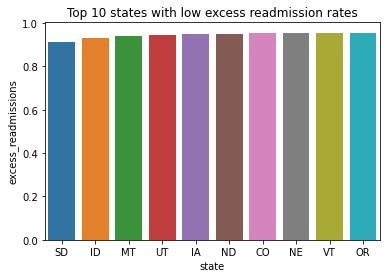

In [65]:
sns.barplot('state', 'excess_readmissions', data=lo_excess)
plt.title('Top 10 states with low excess readmission rates')

/Users/sarahluw/.pyenv/versions/3.6.2/envs/my-virtual-env-3.6.2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 10 states with high excess readmission rates')

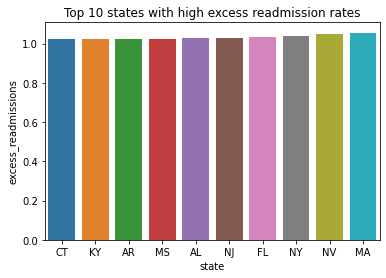

In [66]:
sns.barplot('state', 'excess_readmissions', data=hi_excess)
plt.title('Top 10 states with high excess readmission rates')

In [67]:
## Going back to original dataframe

x = list(clean_hospital_read_df['State'][81:-3])
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

x = pd.DataFrame(x)
y = pd.DataFrame(y)

df = pd.concat([x,y], axis=1)
df.columns = ['state', 'excess_readmissions']
df.tail()

,state,excess_readmissions
11014,NJ,0.9736
11015,NY,0.9405
11016,CA,0.6193
11017,IL,0.9272
11018,FL,1.1233


In [68]:
# Data for SD (South Dakota)

sd = df[df.state == 'SD']
sd = sd['excess_readmissions']
sd.describe()

count    42.00000
mean      0.91126
std       0.07534
min       0.72990
25%       0.88180
50%       0.91155
75%       0.95385
max       1.07310
Name: excess_readmissions, dtype: float64

In [69]:
# Data for CT (Connecticut)

ct = df[df.state == 'CT']
ct = ct['excess_readmissions']
ct.describe()

count    115.000000
mean       1.021938
std        0.090072
min        0.708000
25%        0.965650
50%        1.023200
75%        1.066000
max        1.387600
Name: excess_readmissions, dtype: float64

Here we have an very small p-value, enough for 99% confidence.

In [70]:
# T-test between SD and DC

sp.stats.ttest_ind(sd, ct)

Ttest_indResult(statistic=-7.103518136976388, pvalue=4.141800495058517e-11)

<AxesSubplot:>

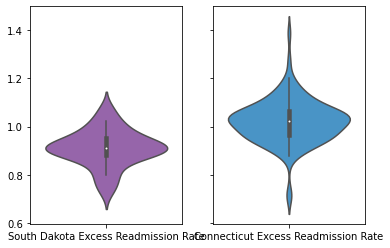

In [71]:
# Visualizing conclusion with violin plot

sd = df[df.state == 'SD']
sd = sd[['excess_readmissions']]
sd.columns = ['South Dakota Excess Readmission Rate']

ct = df[df.state == 'CT']
ct = ct[['excess_readmissions']]
ct.columns = ['Connecticut Excess Readmission Rate']

fig, axs = plt.subplots(ncols=2, sharey=True)
sns.violinplot(data=sd, ax=axs[0], color='#9b59b6')
sns.violinplot(data=ct, ax=axs[1], color='#3498db')

# Conclusion

There is a significant difference between excess readmission rates for different states. (99% confidence)

### Is there a significant relationship between discharges and excess readmission ratio?


In [72]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

X = scale(clean_hospital_read_df["Number of Discharges"])
y = clean_hospital_read_df["Excess Readmission Ratio"]

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Excess Readmission Ratio   R-squared:                       0.017
Model:                                  OLS   Adj. R-squared:                  0.017
Method:                       Least Squares   F-statistic:                     193.9
Date:                      Sat, 22 Jan 2022   Prob (F-statistic):           1.06e-43
Time:                              13:57:07   Log-Likelihood:                 11280.
No. Observations:                     11103   AIC:                        -2.256e+04
Df Residuals:                         11101   BIC:                        -2.254e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0073      0.001   1211.359      0.000       1.006       1.009
x1            -0.0116      0.001    -13.923      0.000      -0.013      -0.010
==============================================================================
Omnibus:                     2917.053   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28884.816
Skew:                           0.975   Prob(JB):                         0.00
Kurtosis:                      10.657   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Is there more to the story?

We should also consider type of readmission. Smaller hospitals seem similar to large hospitals in all readmission types except hip-knee. In fact, most of the difference we see in overall readmission rates between small and large hospitals may be due to hip-knee.

In [73]:
clean_hospital_read_df['Measure Name'].unique()

array(['READM-30-AMI-HRRP', 'READM-30-HF-HRRP', 'READM-30-COPD-HRRP',
       'READM-30-CABG-HRRP', 'READM-30-PN-HRRP', 'READM-30-HIP-KNEE-HRRP'],
      dtype=object)

ratio difference: 1.0788603917403392
Ttest_indResult(statistic=4.999344040795371, pvalue=8.367747764026845e-05)


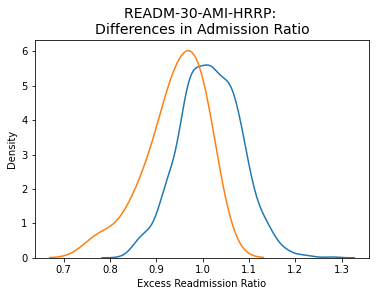

ratio difference: 1.0180520812201312
Ttest_indResult(statistic=3.068307887747887, pvalue=0.0023772305479184764)


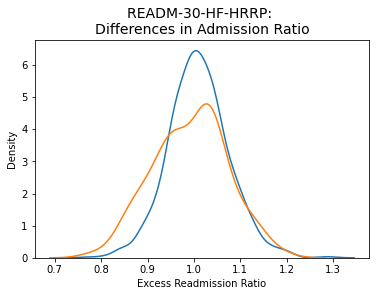

ratio difference: 0.9513385625507199
Ttest_indResult(statistic=-4.165139446618784, pvalue=0.00024747059095084903)


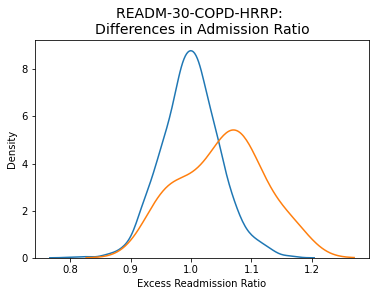

ratio difference: nan
Ttest_indResult(statistic=nan, pvalue=nan)


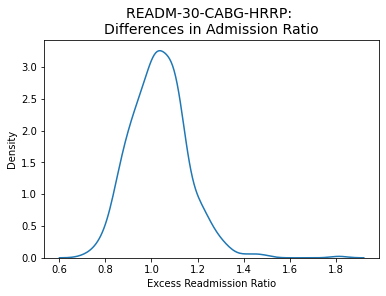

ratio difference: 0.9830162217529445
Ttest_indResult(statistic=-2.7278255698368064, pvalue=0.006815446946335416)


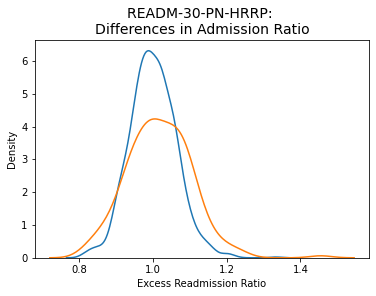

ratio difference: 1.2580184977841646
Ttest_indResult(statistic=16.449925398988405, pvalue=3.690962260983188e-46)


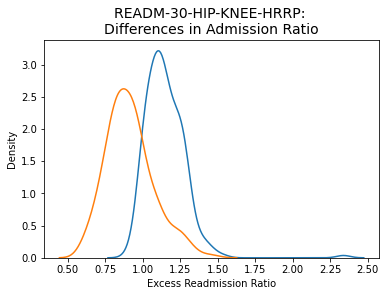

In [77]:
from scipy import stats

def assign_size_1(x):
    if x> 1000:
        size = 3
    elif x > 300:
        size = 2
    else:
        size = 1
    return size

def assign_size_2(x):
    if x> 1000:
        size = 3
    elif x > 100:
        size = 2
    else:
        size = 1
    return size

clean_hospital_read_df['size_1'] = clean_hospital_read_df['Number of Discharges'].apply(assign_size_1)
clean_hospital_read_df['size_2'] = clean_hospital_read_df['Number of Discharges'].apply(assign_size_2)

for i in clean_hospital_read_df['Measure Name'].unique():
    mask1 = (clean_hospital_read_df['size_1'] == 1) & (clean_hospital_read_df['Measure Name'] == i)
    mask2 = (clean_hospital_read_df['size_1'] == 3) & (clean_hospital_read_df['Measure Name'] == i)
    
    ratio_small = clean_hospital_read_df.loc[mask1, 'Excess Readmission Ratio']
    ratio_large = clean_hospital_read_df.loc[mask2, 'Excess Readmission Ratio']
    print('ratio difference:', ratio_small.mean() / ratio_large.mean())
    print(stats.ttest_ind(ratio_small, ratio_large, equal_var = False))
    
    sns.kdeplot(clean_hospital_read_df.loc[mask1, 'Excess Readmission Ratio'], label = '<300 discharges')
    sns.kdeplot(clean_hospital_read_df.loc[mask2, 'Excess Readmission Ratio'], label = '>1000 discharges')
    
    plt.title('%s: \nDifferences in Admission Ratio' %i, fontsize=14)

    plt.show()

#### Overall Conclusion

Small hospitals tend to have higher excess discharge ratios. However, this excess readmission ratio difference is specifically seen in the hip-knee readmissions (p-value < 0.01). This difference also seemed to be clinically significant as the average excess readmission ratio for small hospitals was 1.23 times more than that for large hospitals. All other surgeries showed no significant differences, though pneumonia readmissions showed a borderline insignificant difference (p-value = 0.01006).

Based on this information, I would advise the client to focus on improving performance specifically for hip-knee readmissions among smaller hospitals. There could be many reasons why smaller hospitals perform worse than larger hospitals in hip-knee readmissions, but lack of resources may not be the root cause. Lack of resources should impact all readmission types and not just those related to hip-knee. Therefore, there must be something specific about hip-knee patients that may be affected by hospital size. At this point, I do not have enough information to propose a reason why smaller hospitals underperform.

My next recommendation would be to review the discharge protocol of hip-knee patients, and ensure they are the same between small and large hospitals. If possible, I would also recommend a chart review of selected patients who were readmitted to understand what lead to their readmission.

# Discussion

Excess readmission could be problematic for hospitals dependent of patients using Medicare payments. The first observation suggested that amount of discharges was related to excess readmission rate. After testing, it was true. However, there could be many uncontrolled variables that leads to low or even high discharges. The quick soultion to this was to combine smaller hospitals to make it have higher dispatch rates. This isn't an optimal solution since it requires even more funding to make this occur. The cost may be even more than trying to keep Medicare patients.
    
 The second hypothesis that I made, suggesting that different states having different excess readmission rate looks at this problem in a different angle. It combines all of the hostpitals in each state regardless of dispatches or size. It looks at the average of excess readmission. This method focuses on which states are the best or worst at low excess readmission rates. My assumption is that the better states have better regulatory practices that ensures lower excess readmission rates. We should look at the top states with low excess readmission rates such as South Dakota to see what different practices they have compared to states like Connecticut.